In [2]:
from functools import reduce

import matplotlib.ticker
import matplotlib.pyplot as plt
import torch
_ = torch.set_grad_enabled(False)

In [3]:
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")
plt.rc("font", family="sans-serif", size=20)
plt.rc("axes", titlesize=20, labelsize=20)
plt.rc("xtick", labelsize=20)
plt.rc("ytick", labelsize=20)
plt.rc("legend", fontsize=20)
plt.rc("figure", titlesize=20)

In [3]:
ground_truth_elli = torch.load("runs/fbp_none_gauss_elli/test_ground_truth_0.pt").to("cpu")

fbp_none_gauss_elli = torch.load("runs/fbp_none_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_low_gauss_elli = torch.load("runs/fbp_low_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_high_gauss_elli = torch.load("runs/fbp_high_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_low_uni_elli = torch.load("runs/fbp_low_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_high_uni_elli = torch.load("runs/fbp_high_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")

tik_none_gauss_elli = torch.load("runs/tik_none_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_gauss_elli = torch.load("runs/tik_low_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_high_gauss_elli = torch.load("runs/tik_high_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_uni_elli = torch.load("runs/tik_low_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_high_uni_elli = torch.load("runs/tik_high_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")

fft_none_gauss_elli = torch.load("runs/fft_none_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_low_gauss_elli = torch.load("runs/fft_low_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_high_gauss_elli = torch.load("runs/fft_high_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_low_uni_elli = torch.load("runs/fft_low_uni_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_high_uni_elli = torch.load("runs/fft_high_uni_elli/test_learned_reconstruction_0.pt").to("cpu")

svd_none_gauss_elli = torch.load("runs/svd_none_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
svd_low_gauss_elli = torch.load("runs/svd_low_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
svd_high_gauss_elli = torch.load("runs/svd_high_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
svd_low_uni_elli = torch.load("runs/svd_low_uni_elli/test_learned_reconstruction_0.pt").to("cpu")
svd_high_uni_elli = torch.load("runs/svd_high_uni_elli/test_learned_reconstruction_0.pt").to("cpu")



ground_truth_lodopa = torch.load("runs/fbp_none_gauss_lodopa/test_ground_truth_0.pt").to("cpu")

fbp_none_gauss_lodopa = torch.load("./runs/fbp_none_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_low_gauss_lodopa = torch.load("./runs/fbp_low_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_high_gauss_lodopa = torch.load("./runs/fbp_high_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_low_uni_lodopa = torch.load("./runs/fbp_low_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_high_uni_lodopa = torch.load("./runs/fbp_high_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")

tik_none_gauss_lodopa = torch.load("./runs/tik_none_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_gauss_lodopa = torch.load("./runs/tik_low_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_high_gauss_lodopa = torch.load("./runs/tik_high_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_uni_lodopa = torch.load("./runs/tik_low_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_high_uni_lodopa = torch.load("./runs/tik_high_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")

fft_none_gauss_lodopa = torch.load("./runs/fft_none_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_low_gauss_lodopa = torch.load("./runs/fft_low_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_high_gauss_lodopa = torch.load("./runs/fft_high_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_low_uni_lodopa = torch.load("./runs/fft_low_uni_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_high_uni_lodopa = torch.load("./runs/fft_high_uni_lodopa/test_learned_reconstruction_0.pt").to("cpu")

#svd_none_gauss_lodopa = torch.load("./runs/svd_none_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")
#svd_low_gauss_lodopa = torch.load("./runs/svd_low_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")
#svd_high_gauss_lodopa = torch.load("./runs/svd_high_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")
#svd_low_uni_lodopa = torch.load("./runs/svd_low_uni_lodopa/test_learned_reconstruction_0.pt").to("cpu")
#svd_high_uni_lodopa = torch.load("./runs/svd_high_uni_lodopa/test_learned_reconstruction_0.pt").to("cpu")

In [9]:
plt.imshow(torch.load("./runs/fft_low_gauss_elli/test_noisy_sinogram_0.pt").to("cpu"))
print(torch.load("./runs/fft_low_gauss_elli/test_noisy_sinogram_0.pt").to("cpu").mode())
_ = plt.colorbar()

FileNotFoundError: [Errno 2] No such file or directory: './runs/fft_none_gauss_elli/test_noisy_sinogram_0.pt'

In [4]:
all_elli = [
    fbp_none_gauss_elli,
    fbp_low_gauss_elli,
    fbp_high_gauss_elli,
    fbp_low_uni_elli,
    fbp_high_uni_elli,

    tik_none_gauss_elli,
    tik_low_gauss_elli,
    tik_high_gauss_elli,
    tik_low_uni_elli,
    tik_high_uni_elli,

    fft_none_gauss_elli,
    fft_low_gauss_elli,
    fft_high_gauss_elli,
    fft_low_uni_elli,
    fft_high_uni_elli,

    svd_none_gauss_elli,
    svd_low_gauss_elli,
    svd_high_gauss_elli,
    svd_low_uni_elli,
    svd_high_uni_elli
]
vmin_elli = min(reduce(min, map(lambda x: x.min(), all_elli), 0), 0)
vmax_elli = max(reduce(max, map(lambda x: x.max(), all_elli), 1), 1)



all_lodopab = [
    fbp_none_gauss_lodopa,
    fbp_low_gauss_lodopa,
    fbp_high_gauss_lodopa,
    fbp_low_uni_lodopa,
    fbp_high_uni_lodopa,

    tik_none_gauss_lodopa,
    tik_low_gauss_lodopa,
    tik_high_gauss_lodopa,
    tik_low_uni_lodopa,
    tik_high_uni_lodopa,

    fft_none_gauss_lodopa,
    fft_low_gauss_lodopa,
    fft_high_gauss_lodopa,
    fft_low_uni_lodopa,
    fft_high_uni_lodopa,

    #svd_none_gauss_lodopa,
    #svd_low_gauss_lodopa,
    #svd_high_gauss_lodopa,
    #svd_low_uni_lodopa,
    #svd_high_uni_lodopa
]
vmin_lodopab = min(reduce(min, map(lambda x: x.min(), all_lodopab), 0), 0)
vmax_lodopab = max(reduce(max, map(lambda x: x.max(), all_lodopab), 1), 1)

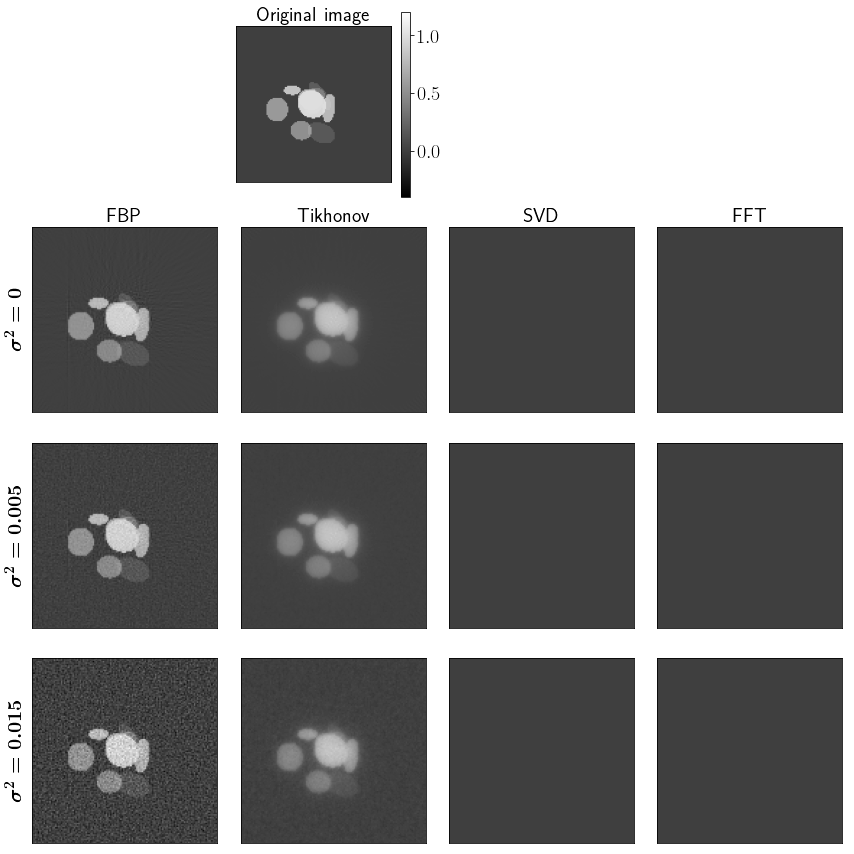

In [37]:
plt.subplots(4,4,figsize=(12,12))
plt.subplot(4,4,1)
plt.axis("off")
plt.subplot(4,4,2)
plt.title("Original image")
plt.imshow(ground_truth_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.colorbar()
plt.subplot(4,4,3)
plt.axis("off")
plt.subplot(4,4,4)
plt.axis("off")

plt.subplot(4,4,5)
plt.ylabel("\\boldmath$\\sigma^2 = 0$")
plt.title("FBP")
plt.imshow(fbp_none_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,6)
plt.title("Tikhonov")
plt.imshow(tik_none_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,7)
plt.title("SVD")
plt.imshow(svd_none_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,8)
plt.title("FFT")
plt.imshow(fft_none_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.subplot(4,4,9)
plt.ylabel("\\boldmath$\\sigma^2 = 0.005$")
plt.imshow(fbp_low_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,10)
plt.imshow(tik_low_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,11)
plt.imshow(svd_low_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,12)
plt.imshow(fft_low_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.subplot(4,4,13)
plt.ylabel("\\boldmath$\\sigma^2 = 0.015$")
plt.imshow(fbp_high_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,14)
plt.imshow(tik_high_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,15)
plt.imshow(svd_high_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,16)
plt.imshow(fft_high_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.tight_layout()
plt.show()

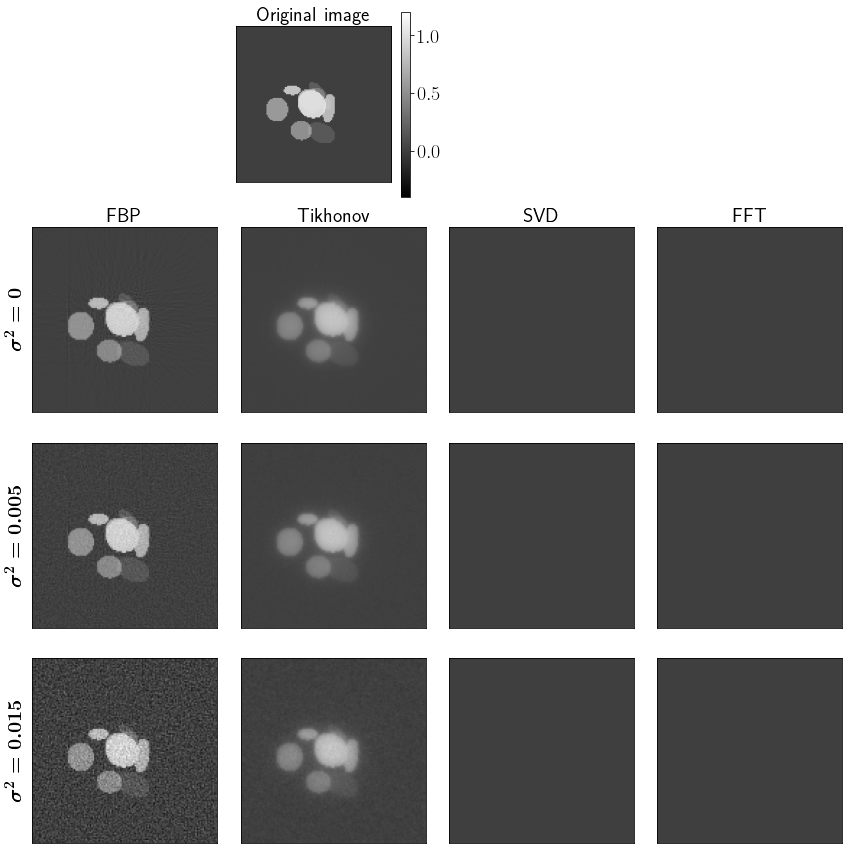

In [6]:
plt.subplots(4,4,figsize=(12,12))
plt.subplot(4,4,1)
plt.axis("off")
plt.subplot(4,4,2)
plt.title("Original image")
plt.imshow(ground_truth_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.colorbar()
plt.subplot(4,4,3)
plt.axis("off")
plt.subplot(4,4,4)
plt.axis("off")

plt.subplot(4,4,5)
plt.ylabel("\\boldmath$\\sigma^2 = 0$")
plt.title("FBP")
plt.imshow(fbp_none_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,6)
plt.title("Tikhonov")
plt.imshow(tik_none_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,7)
plt.title("SVD")
plt.imshow(svd_none_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,8)
plt.title("FFT")
plt.imshow(fft_none_gauss_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.subplot(4,4,9)
plt.ylabel("\\boldmath$\\sigma^2 = 0.005$")
plt.imshow(fbp_low_uni_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,10)
plt.imshow(tik_low_uni_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,11)
plt.imshow(svd_low_uni_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,12)
plt.imshow(fft_low_uni_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.subplot(4,4,13)
plt.ylabel("\\boldmath$\\sigma^2 = 0.015$")
plt.imshow(fbp_high_uni_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,14)
plt.imshow(tik_high_uni_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,15)
plt.imshow(svd_high_uni_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,16)
plt.imshow(fft_high_uni_elli, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.tight_layout()
plt.show()

NameError: name 'ground_truth_lodopab' is not defined

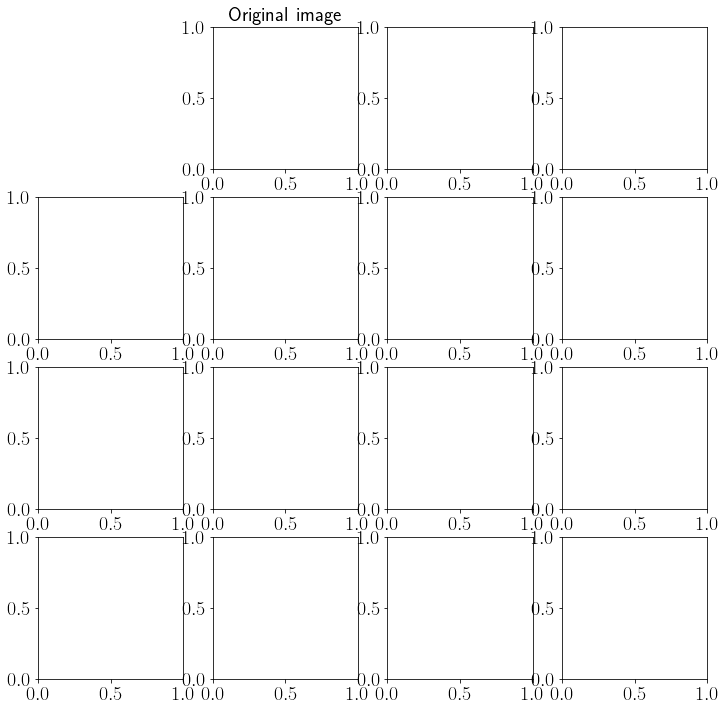

In [7]:
plt.subplots(4,4,figsize=(12,12))
plt.subplot(4,4,1)
plt.axis("off")
plt.subplot(4,4,2)
plt.title("Original image")
plt.imshow(ground_truth_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.colorbar()
plt.subplot(4,4,3)
plt.axis("off")
plt.subplot(4,4,4)
plt.axis("off")

plt.subplot(4,4,5)
plt.ylabel("\\boldmath$\\sigma^2 = 0$")
plt.title("FBP")
plt.imshow(fbp_none_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,6)
plt.title("Tikhonov")
plt.imshow(tik_none_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,7)
plt.title("SVD")
plt.imshow(svd_none_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,8)
plt.title("FFT")
plt.imshow(fft_none_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.subplot(4,4,9)
plt.ylabel("\\boldmath$\\sigma^2 = 0.005$")
plt.imshow(fbp_low_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,10)
plt.imshow(tik_low_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,11)
plt.imshow(svd_low_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,12)
plt.imshow(fft_low_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.subplot(4,4,13)
plt.ylabel("\\boldmath$\\sigma^2 = 0.015$")
plt.imshow(fbp_high_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,14)
plt.imshow(tik_high_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,15)
plt.imshow(svd_high_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,16)
plt.imshow(fft_high_gauss_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.tight_layout()
plt.show()

In [ ]:
plt.subplots(4,4,figsize=(12,12))
plt.subplot(4,4,1)
plt.axis("off")
plt.subplot(4,4,2)
plt.title("Original image")
plt.imshow(ground_truth_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.colorbar()
plt.subplot(4,4,3)
plt.axis("off")
plt.subplot(4,4,4)
plt.axis("off")

plt.subplot(4,4,5)
plt.ylabel("\\boldmath$\\sigma^2 = 0$")
plt.title("FBP")
plt.imshow(fbp_none_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,6)
plt.title("Tikhonov")
plt.imshow(tik_none_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,7)
plt.title("SVD")
plt.imshow(svd_none_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,8)
plt.title("FFT")
plt.imshow(fft_none_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.subplot(4,4,9)
plt.ylabel("\\boldmath$\\sigma^2 = 0.005$")
plt.imshow(fbp_low_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,10)
plt.imshow(tik_low_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,11)
plt.imshow(svd_low_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,12)
plt.imshow(fft_low_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.subplot(4,4,13)
plt.ylabel("\\boldmath$\\sigma^2 = 0.015$")
plt.imshow(fbp_high_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,14)
plt.imshow(tik_high_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,15)
plt.imshow(svd_high_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.subplot(4,4,16)
plt.imshow(fft_high_uni_lodopab, cmap="gray", vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.tight_layout()
plt.show()